# Binary classification for revenue optimization problem

### Decision tree classifier

In [171]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler

### Load data

In [192]:
demo=pd.read_excel('D:/Courses and Projects/Revenue optimization/Task_Data_Scientist_Dataset.xlsx',sheet_name=1)
demo.describe()
demo.shape

(1615, 4)

In [193]:
prod_balance=pd.read_excel('D:/Courses and Projects/Revenue optimization/Task_Data_Scientist_Dataset.xlsx',sheet_name=2)
prod_balance.describe()
prod_balance.shape

(1615, 13)

In [194]:
inflow_outflow=pd.read_excel('D:/Courses and Projects/Revenue optimization/Task_Data_Scientist_Dataset.xlsx',sheet_name=3)
inflow_outflow.describe()
inflow_outflow.shape

(1587, 15)

In [195]:
sales_revenue=pd.read_excel('D:/Courses and Projects/Revenue optimization/Task_Data_Scientist_Dataset.xlsx',sheet_name=4)
sales_revenue.describe()
sales_revenue.shape

(969, 7)

Check for missing data

In [196]:
print('Columns with null values in Demo data:',demo.isnull().sum(), sep = '\n')

Columns with null values in Demo data:
Client    0
Sex       3
Age       0
Tenure    0
dtype: int64


In [197]:
print('Columns with null values in AccBalance data:',prod_balance.isnull().sum(), sep = '\n')

Columns with null values in AccBalance data:
Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64


In [198]:
print('Columns with null values in AccBalance data:',prod_balance.isnull().sum(), sep = '\n')

Columns with null values in AccBalance data:
Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64


In [199]:
print('Columns with null values in Flow data:',inflow_outflow.isnull().sum(), sep = '\n')

Columns with null values in Flow data:
Client                          0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
dtype: int64


In [200]:
print('Columns with null values in Sales data:',sales_revenue.isnull().sum(), sep = '\n')

Columns with null values in Sales data:
Client        0
Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64


### Replace missing values

In [201]:
cols=['Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']
prod_balance[cols]=prod_balance[cols].fillna(0)
print('Columns with null values in AccBalance data:',prod_balance.isnull().sum(), sep = '\n')

Columns with null values in AccBalance data:
Client        0
Count_CA      0
Count_SA      0
Count_MF      0
Count_OVD     0
Count_CC      0
Count_CL      0
ActBal_CA     0
ActBal_SA     0
ActBal_MF     0
ActBal_OVD    0
ActBal_CC     0
ActBal_CL     0
dtype: int64


In [202]:
demo['Sex'].fillna('Other',inplace=True)
print('Columns with null values in Demo data:',demo.isnull().sum(), sep = '\n')

Columns with null values in Demo data:
Client    0
Sex       0
Age       0
Tenure    0
dtype: int64


### Data manipulation: Process data based on assumptions

In [203]:
demo = pd.get_dummies(demo, columns = ['Sex'])
demo.head()

,Client,Age,Tenure,Sex_F,Sex_M,Sex_Other
0,1,51,7,1,0,0
1,2,43,152,0,1,0
2,3,17,140,0,1,0
3,4,24,153,0,1,0
4,5,58,200,1,0,0


In [204]:
demo['Tenure_years']=demo['Tenure']/12
demo.head()

,Client,Age,Tenure,Sex_F,Sex_M,Sex_Other,Tenure_years
0,1,51,7,1,0,0,0.583333
1,2,43,152,0,1,0,12.666667
2,3,17,140,0,1,0,11.666667
3,4,24,153,0,1,0,12.750000
4,5,58,200,1,0,0,16.666667


Delete records where client's age is less than tenure in years

In [205]:
demo_filtered=demo[demo['Age']>=demo['Tenure_years']]
demo_filtered.shape

(1568, 7)

### Data integration

In [206]:
demo_balance=demo_filtered.merge(prod_balance,on="Client")
demo_balance.shape

(1568, 19)

In [207]:
demo_balance_inflow=demo_balance.merge(inflow_outflow,on="Client")
demo_balance_inflow.shape

(1540, 33)

In [208]:
demo_balance_inflow.head()

,Client,Age,Tenure,Sex_F,Sex_M,Sex_Other,Tenure_years,Count_CA,Count_SA,Count_MF,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1,51,7,1,0,0,0.583333,1,0.0,0.0,...,1891.353214,1335.619643,250.000000,283.089286,247.607143,50,30,3,12,9
1,2,43,152,0,1,0,12.666667,1,1.0,0.0,...,386.442857,386.442857,307.142857,38.407143,35.714286,6,6,2,2,1
2,3,17,140,0,1,0,11.666667,1,0.0,1.0,...,123.750000,123.750000,0.000000,112.857143,10.678571,3,3,0,1,1
3,4,24,153,0,1,0,12.750000,1,1.0,0.0,...,3614.747500,3598.950357,714.285714,526.037500,1963.165357,41,36,6,12,13
4,5,58,200,1,0,0,16.666667,1,1.0,0.0,...,5868.460714,4031.925000,157.142857,832.175000,1779.571429,44,41,4,17,13


Delete records where a minor client holds either a consumer loan or a credit card. Note that a minor client can have a mutual fund account in their name, with the guidance of an adult family member. 

In [209]:
# delete all records where a client with age < 18 has either a credit card or consumer loan. 
# Note: Minor clients can only have mutual funds in their name
index=demo_balance_inflow[(demo_balance_inflow['Age']<18) & ((demo_balance_inflow['Count_CL'] > 0)| (demo_balance_inflow['Count_CC'] > 0))].index
demo_balance_inflow.drop(index,inplace=True)
demo_balance_inflow.shape

(1531, 33)

In [210]:
data=demo_balance_inflow.merge(sales_revenue,on="Client")
data.shape

(911, 39)

In [211]:
# Random filter check on final merged data
data[(data['Age']<18) & (data['Count_CL']>0)]
raw_data=data.copy()

In [212]:
print('Columns with null values in the data:',raw_data.isnull().sum(), sep = '\n')

Columns with null values in the data:
Client                          0
Age                             0
Tenure                          0
Sex_F                           0
Sex_M                           0
Sex_Other                       0
Tenure_years                    0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
Transactio

### Normalizing the features 

Normalize all features to the range [0,1], except Client_ID. This is done to optimize the training process of the machine learning model. 

In [213]:
# Perform min-max normalization
scaler = MinMaxScaler()
data.iloc[:,1:33] = scaler.fit_transform(data.iloc[:,1:33])

# convert the array back to a dataframe
data_norm = DataFrame(data)

In [214]:
data_norm.describe()

,Client,Age,Tenure,Sex_F,Sex_M,Sex_Other,Tenure_years,Count_CA,Count_SA,Count_MF,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,...,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,810.196487,0.464661,0.364123,0.462130,0.535675,0.002195,0.364123,0.025979,0.109404,0.011922,...,0.167894,0.081537,0.090011,0.137890,0.205269,0.251372,0.290889,1.985947,2.822308,3.441812
std,463.669169,0.204704,0.239767,0.498838,0.499000,0.046829,0.239767,0.110204,0.194197,0.052758,...,0.158217,0.108857,0.140808,0.155307,0.404120,0.434040,0.454422,10.183239,18.231940,7.607763
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,420.500000,0.294118,0.147601,0.000000,0.000000,0.000000,0.147601,0.000000,0.000000,0.000000,...,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,812.000000,0.435294,0.339483,0.000000,1.000000,0.000000,0.339483,0.000000,0.000000,0.000000,...,0.132530,0.040000,0.033333,0.088235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1213.500000,0.635294,0.557196,1.000000,1.000000,0.000000,0.557196,0.000000,0.333333,0.000000,...,0.228916,0.120000,0.116667,0.205882,0.000000,1.000000,1.000000,0.000000,0.142857,4.250000
max,1613.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


In [215]:
data_norm.shape

(911, 39)

In [216]:
data_norm.head()

,Client,Age,Tenure,Sex_F,Sex_M,Sex_Other,Tenure_years,Count_CA,Count_SA,Count_MF,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,0.541176,0.025830,1.0,0.0,0.0,0.025830,0.0,0.000000,0.0,...,0.361446,0.12,0.200000,0.264706,1,0,0,26.972679,0.0,0.0
1,2,0.447059,0.560886,0.0,1.0,0.0,0.560886,0.0,0.333333,0.0,...,0.072289,0.08,0.033333,0.029412,0,0,0,0.000000,0.0,0.0
2,6,0.223529,0.070111,1.0,0.0,0.0,0.070111,0.0,0.000000,0.0,...,0.072289,0.04,0.000000,0.000000,0,0,0,0.000000,0.0,0.0
3,8,0.694118,0.110701,1.0,0.0,0.0,0.110701,0.0,0.000000,0.0,...,0.289157,0.40,0.016667,0.000000,0,0,0,0.000000,0.0,0.0
4,13,0.717647,0.487085,1.0,0.0,0.0,0.487085,0.0,0.333333,0.0,...,0.469880,0.24,0.283333,0.294118,0,0,0,0.000000,0.0,0.0


## Model for customer propensity to buy mutual funds

In [217]:
# Using normalized data
X=data_norm.iloc[:,:33] 
y=data_norm.iloc[:,33] 
revenue_MF = data_norm.loc[:,'Revenue_MF']
X_revenue=pd.concat([X,revenue_MF],axis=1)

In [218]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=0,stratify=y) 

### Training a Decision Tree Classifier

In [219]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_gini=model_gini.fit(X_train,y_train)

#get predictions from the model
y_pred=model_gini.predict(X_test)
target_names=['Sales_MF']
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       109
           1       0.46      0.21      0.29        28

    accuracy                           0.79       137
   macro avg       0.64      0.58      0.58       137
weighted avg       0.75      0.79      0.76       137



In [220]:
# Predict propensity 
pred_prob=model_gini.predict_proba(X_test)[:,1]
pred_prob

array([0.46223224, 0.46223224, 0.        , 0.46223224, 0.8056065 ,
       0.46223224, 0.        , 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.88552916, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.8056065 , 0.46223224, 0.46223224, 0.46223224,
       0.46223224, 0.88552916, 0.46223224, 0.        , 0.46223224,
       0.46223224, 0.46223224, 0.8056065 , 0.46223224, 0.46223224,
       0.46223224, 0.46223224, 0.46223224, 0.46223224, 0.46223224,
       0.8056065 , 0.46223224, 0.8056065 , 0.46223224, 0.46223

In [221]:
clients=X_test.loc[:,'Client']
revenue=data.query('Client in @clients')['Revenue_MF']
propensity=pred_prob
revenue_adjusted=revenue.multiply(propensity)

Propensity_MF=pd.DataFrame({"Client":clients, "Revenue":revenue,"Propensity":propensity})
Propensity_MF.sort_values("Propensity",ascending=False,inplace=True)

# Add adjusted revenue field by multiplying revenue and propensity to buy the corresponding product
Propensity_MF['Revenue_adjusted'] = revenue_adjusted
Propensity_MF.sort_values("Propensity",ascending=False, inplace=True)
Propensity_MF

,Client,Revenue,Propensity,Revenue_adjusted
617,1091,4.910714,0.885529,4.348581
393,704,0.000000,0.885529,0.000000
208,388,0.000000,0.885529,0.000000
682,1213,0.000000,0.885529,0.000000
734,1302,10.126429,0.885529,8.967248
...,...,...,...,...
649,1158,1.656250,0.000000,0.000000
548,973,0.686429,0.000000,0.000000
642,1144,0.000000,0.000000,0.000000
754,1333,0.000000,0.000000,0.000000


### Feature selection using Decision tree

The goal is to use decision tree classifier to reduce dimensions of the data (feature selection), after which the machine learning model should be able to perform the same as before, or better.

In [222]:
#define the model
model=DecisionTreeClassifier() # default split criterion: gini 
#fit the model with X,y data
model.fit(X,y)
#get feature importance
importance=model.feature_importances_
#summarize feature importance
df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
df.set_index('Feature',inplace=True)
df.sort_values(by='Importance',ascending=False,inplace=True)
df

,Importance
Feature,
Client,0.120214
VolumeDeb_CA,0.081157
VolumeCred_CA,0.081144
Age,0.075070
ActBal_CA,0.073411
VolumeDebCashless_Card,0.072251
Tenure_years,0.062394
TransactionsDebCashless_Card,0.042801
VolumeDebCash_Card,0.040588


In [223]:
# Include features with importance scores > 0.01
cols_to_include=df[df['Importance']>0.01].index.tolist()

### Training a Decision tree classifier with selected features

In [224]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_gini=model_gini.fit(X_train.loc[:,cols_to_include],y_train)

#get predictions from the model
y_pred=model_gini.predict(X_test.loc[:,cols_to_include])
target_names=['Sales_MF']
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       109
           1       0.46      0.21      0.29        28

    accuracy                           0.79       137
   macro avg       0.64      0.58      0.58       137
weighted avg       0.75      0.79      0.76       137



Comparing precision, recall and F1 scores before and after feature selection, it is evident that with reduced set of features, the model performance does not change after reducing a number of features. Hence, this step acts as dimension reduction.

### Handling imbalanced data 

Visualize the distribution of target variable (Sales) in class values 0 and 1. Often times, a mismatch in target data distribution hampers the learning capacity of the machine learning model.

Text(0, 0.5, 'Count')

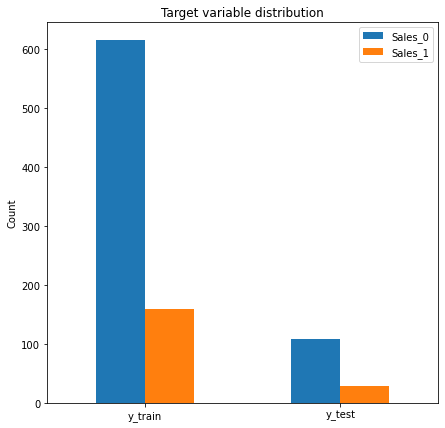

In [225]:
# Visualize target data distribution
plotdata=pd.DataFrame({
    "Sales_0":[y_train.value_counts()[0],y_test.value_counts()[0]],
    "Sales_1":[y_train.value_counts()[1],y_test.value_counts()[1]]},
     index=["y_train","y_test"])
plotdata.plot(kind="bar",figsize=(7,7))
plt.xticks(rotation="horizontal")
plt.title("Target variable distribution")
plt.ylabel("Count")

Note that the data available for Sales_1 field is far lesser than the data available for Sales_0 field. This could contribute to poor model performance. There are many ways to handle imbalance in datasets: namely Undersampling, Oversampling, Generation of synthetic data using SMOTE. Among all these methods, undersampling is not applicable for this problem, because we already have insufficient data to start with. Hence, I'm using oversampling to handle the problem of imbalanced data.

In [226]:
# Using oversampling to handle the imbalance in proportion of samples belonging to Sales_0 and Sales_1
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_revenue,y)

In [227]:
# Splitting data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.15, random_state=0,stratify=y_over) 

Text(0, 0.5, 'Count')

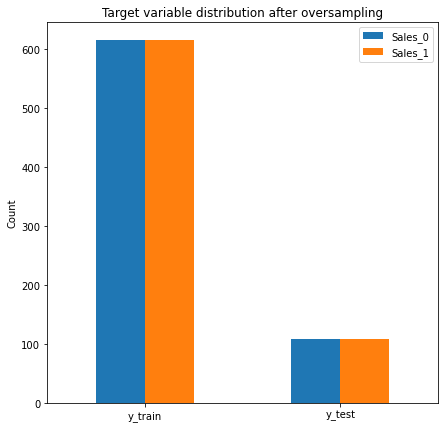

In [228]:
# Visualize target data distribution for over-sampled data
plotdata=pd.DataFrame({
    "Sales_0":[y_train_over.value_counts()[0],y_test_over.value_counts()[0]],
    "Sales_1":[y_train_over.value_counts()[1],y_test_over.value_counts()[1]]},
     index=["y_train","y_test"])
plotdata.plot(kind="bar",figsize=(7,7))
plt.xticks(rotation="horizontal")
plt.title("Target variable distribution after oversampling")
plt.ylabel("Count")

Now train the Decision tree model to see if there is any improvement in model performance

### Training Decision tree classifier with the balanced data

In [229]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_DT_over=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_DT_over=model_DT_over.fit(X_train_over.loc[:,X_train_over.columns!='Revenue_MF'],y_train_over)

# Calculate weights of each feature
importance=model_DT_over.feature_importances_

#summarize feature importance
df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
df.set_index('Feature',inplace=True)
df.sort_values(by='Importance',ascending=False,inplace=True)

#get predictions from the model
y_pred_DT_over=model_DT_over.predict(X_test_over.loc[:,X_test_over.columns!='Revenue_MF'])

# Probability of predictions
pred_prob_over=model_DT_over.predict_proba(X_test_over.loc[:,X_test_over.columns!='Revenue_MF'])[:,1]  # probability for class value 1

target_names=['Sales_MF']
print(classification_report(y_test_over,y_pred_DT_over))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       109
           1       0.66      0.40      0.50       109

    accuracy                           0.60       218
   macro avg       0.61      0.60      0.58       218
weighted avg       0.61      0.60      0.58       218



In [230]:
print("Feature importance: {0}\n".format(df))

Feature importance:                               Importance
Feature                                 
TransactionsDebCashless_Card    0.260131
Count_MF                        0.188372
TransactionsCred_CA             0.140501
VolumeDebCash_Card              0.134491
Age                             0.126009
VolumeCred                      0.123113
VolumeDeb_CA                    0.027383
TransactionsDeb                 0.000000
VolumeDeb_PaymentOrder          0.000000
VolumeDebCashless_Card          0.000000
ActBal_CL                       0.000000
TransactionsDeb_CA              0.000000
VolumeDeb                       0.000000
TransactionsDebCash_Card        0.000000
TransactionsCred                0.000000
VolumeCred_CA                   0.000000
Client                          0.000000
ActBal_OVD                      0.000000
ActBal_CC                       0.000000
ActBal_MF                       0.000000
ActBal_SA                       0.000000
ActBal_CA                       0.000

There does seem to be an improvement in evaluation metrics, especially for class 1. Now get propensity and revenue scores from the model

In [231]:
clients=X_test_over.loc[:,'Client']
propensity=pred_prob_over
Propensity_MF_over=pd.DataFrame({"Client":clients,"Propensity":propensity})

Propensity_MF_over.drop_duplicates(subset=['Client'],inplace=True)
Propensity_MF_over['Propensity'].shape
clients=Propensity_MF_over['Client']

revenue = X_test_over.query('Client in @clients')['Revenue_MF']
revenue_adjusted = revenue.multiply(Propensity_MF_over['Propensity'])

# Add adjusted revenue field by multiplying revenue and propensity to buy the corresponding product
Propensity_MF_over['Revenue'] = revenue
Propensity_MF_over['Revenue_adjusted'] = revenue_adjusted
Propensity_MF_over.sort_values("Propensity",ascending=False, inplace=True)
Propensity_MF_over

,Client,Propensity,Revenue,Revenue_adjusted
949,725,1.0,2.594464,2.594464
1316,75,1.0,0.004821,0.004821
1290,1091,1.0,4.910714,4.910714
1014,42,1.0,15.275714,15.275714
222,414,1.0,0.000000,0.000000
...,...,...,...,...
1245,1104,0.4,0.699643,0.279857
118,210,0.4,0.000000,0.000000
10,22,0.4,0.000000,0.000000
691,1224,0.0,0.000000,0.000000


## Model for customer propensity to buy credit card

In [233]:
# Using normalized data
X=data_norm.iloc[:,:33] 
y=data_norm.iloc[:,34:35] 
revenue_CC = data_norm.loc[:,'Revenue_CC']
X_revenue=pd.concat([X,revenue_CC],axis=1)

In [234]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=0,stratify=y) 

In [235]:
X_train.shape

(774, 33)

In [236]:
X_test.shape

(137, 33)

In [237]:
X_test.head()

,Client,Age,Tenure,Sex_F,Sex_M,Sex_Other,Tenure_years,Count_CA,Count_SA,Count_MF,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
312,564,0.623529,0.118081,0.0,1.0,0.0,0.118081,0.000000,0.000000,0.000000,...,0.002115,0.002129,0.000000,0.000000,0.002167,0.029412,0.036145,0.00,0.000000,0.058824
341,610,0.282353,0.782288,0.0,1.0,0.0,0.782288,0.000000,0.333333,0.012658,...,0.134268,0.134659,0.005758,0.008915,0.019858,0.166667,0.180723,0.08,0.016667,0.235294
507,904,0.211765,0.560886,1.0,0.0,0.0,0.560886,0.000000,0.000000,0.000000,...,0.010132,0.010200,0.010000,0.083284,0.001836,0.137255,0.168675,0.04,0.150000,0.088235
809,1428,0.529412,0.557196,1.0,0.0,0.0,0.557196,0.000000,0.000000,0.000000,...,0.000014,0.000014,0.000000,0.000000,0.000000,0.058824,0.012048,0.00,0.000000,0.000000
268,486,0.447059,0.719557,0.0,1.0,0.0,0.719557,0.333333,0.000000,0.000000,...,0.000086,0.000086,0.000000,0.000000,0.000000,0.009804,0.012048,0.00,0.000000,0.000000


### Training a Decision Tree Classifier

In [238]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_gini=model_gini.fit(X_train,y_train)

#get predictions from the model
y_pred_gini=model_gini.predict(X_test)
target_names=['Sales_CC']
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       103
           1       0.35      0.21      0.26        34

    accuracy                           0.71       137
   macro avg       0.56      0.54      0.54       137
weighted avg       0.67      0.71      0.68       137



In [239]:
# Predict propensity 
pred_prob=model_gini.predict_proba(X_test)[:,1]
pred_prob

array([0.42198182, 0.42198182, 0.42198182, 0.64765101, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.64765101,
       0.95409605, 0.42198182, 0.42198182, 0.42198182, 0.54289733,
       0.42198182, 0.64765101, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.95409605,
       0.42198182, 0.64765101, 0.42198182, 0.42198182, 0.42198182,
       0.95409605, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.42198182,
       0.42198182, 0.64765101, 0.42198182, 0.42198182, 0.95409605,
       0.42198182, 0.42198182, 0.42198182, 0.42198182, 0.95409

In [241]:
clients=X_test.loc[:,'Client']
revenue=data.query('Client in @clients')['Revenue_CC']
propensity=pred_prob
revenue_adjusted=revenue.multiply(propensity)

Propensity_CC=pd.DataFrame({"Client":clients, "Revenue":revenue,"Propensity":propensity})
Propensity_CC['Revenue adjusted'] = revenue_adjusted
Propensity_CC.sort_values("Propensity",ascending=False,inplace=True)
Propensity_CC

,Client,Revenue,Propensity,Revenue adjusted
121,215,0.000000,0.954096,0.000000
431,767,0.000000,0.954096,0.000000
276,499,0.000000,0.954096,0.000000
470,840,3.510714,0.954096,3.349559
235,436,0.000000,0.954096,0.000000
...,...,...,...,...
228,421,0.000000,0.421982,0.000000
221,413,0.000000,0.421982,0.000000
220,412,0.893929,0.421982,0.377222
194,361,0.000000,0.421982,0.000000


### Feature selection using Decision tree

The goal is to use decision tree classifier to reduce dimensions of the data (feature selection), after which the machine learning model should be able to perform the same as before, or better.

In [242]:
#define the model
model=DecisionTreeClassifier() # default split criterion: gini 
#fit the model with X,y data
model.fit(X,y)
#get feature importance
importance=model.feature_importances_
#summarize feature importance
df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
df.set_index('Feature',inplace=True)
df.sort_values(by='Importance',ascending=False,inplace=True)
df

,Importance
Feature,
ActBal_CA,0.152215
VolumeDeb_PaymentOrder,0.109983
ActBal_SA,0.082859
TransactionsDeb_PaymentOrder,0.071328
Tenure,0.053784
VolumeDeb_CA,0.048975
Age,0.041639
Tenure_years,0.040607
TransactionsCred,0.040486


In [243]:
# Include features with importance scores > 0.01
cols_to_include=df[df['Importance']>0.01].index.tolist()

### Training a Decision tree classifier with selected features

In [244]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_gini=model_gini.fit(X_train.loc[:,cols_to_include],y_train)

#get predictions from the model
y_pred=model_gini.predict(X_test.loc[:,cols_to_include])
target_names=['Sales_MF']
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       103
           1       0.35      0.21      0.26        34

    accuracy                           0.71       137
   macro avg       0.56      0.54      0.54       137
weighted avg       0.67      0.71      0.68       137



Comparing precision, recall and F1 scores before and after feature selection, it is evident that with reduced set of features, the model performance does not change after reducing a number of features. Hence, this step acts as dimension reduction.

### Handling imbalanced data 

Visualize the distribution of target variable (Sales) in class values 0 and 1. Often times, a mismatch in target data distribution hampers the learning capacity of the machine learning model.

Text(0, 0.5, 'Count')

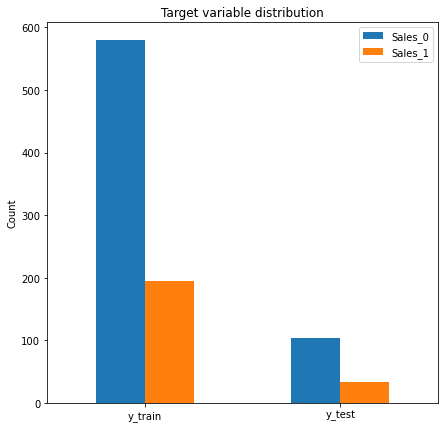

In [245]:
# Visualize target data distribution
plotdata=pd.DataFrame({
    "Sales_0":[y_train.value_counts()[0],y_test.value_counts()[0]],
    "Sales_1":[y_train.value_counts()[1],y_test.value_counts()[1]]},
     index=["y_train","y_test"])
plotdata.plot(kind="bar",figsize=(7,7))
plt.xticks(rotation="horizontal")
plt.title("Target variable distribution")
plt.ylabel("Count")

Note that the data available for Sales_1 field is far lesser than the data available for Sales_0 field. This could contribute to poor model performance. There are many ways to handle imbalance in datasets: namely Undersampling, Oversampling, Generation of synthetic data using SMOTE. Among all these methods, undersampling is not applicable for this problem, because we already have insufficient data to start with. Hence, oversampling is used to handle the problem of imbalanced data in this case.

In [246]:
# Using oversampling to handle the imbalance in proportion of samples belonging to Sales_0 and Sales_1
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_revenue,y)

In [247]:
# Splitting data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.15, random_state=0,stratify=y_over) 

Text(0, 0.5, 'Count')

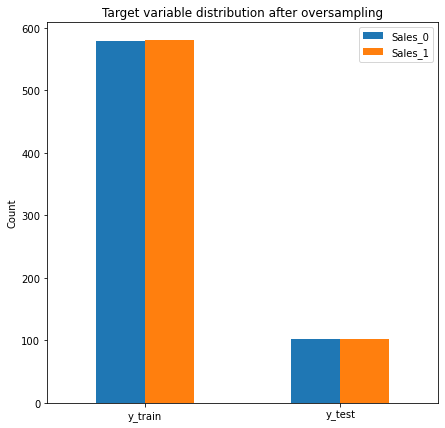

In [248]:
# Visualize target data distribution for over-sampled data
plotdata=pd.DataFrame({
    "Sales_0":[y_train_over.value_counts()[0],y_test_over.value_counts()[0]],
    "Sales_1":[y_train_over.value_counts()[1],y_test_over.value_counts()[1]]},
     index=["y_train","y_test"])
plotdata.plot(kind="bar",figsize=(7,7))
plt.xticks(rotation="horizontal")
plt.title("Target variable distribution after oversampling")
plt.ylabel("Count")

Now train the Decision tree model to see if there is any improvement in model performance

### Training Decision tree classifier with the balanced data

In [249]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_DT_over=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_DT_over=model_DT_over.fit(X_train_over.loc[:,X_train_over.columns!='Revenue_CC'],y_train_over)

# Calculate weights of each feature
importance=model_DT_over.feature_importances_

#summarize feature importance
df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
df.set_index('Feature',inplace=True)
df.sort_values(by='Importance',ascending=False,inplace=True)

#get predictions from the model
y_pred_DT_over=model_DT_over.predict(X_test_over.loc[:,X_test_over.columns!='Revenue_CC'])

# Probability of predictions
pred_prob_over=model_DT_over.predict_proba(X_test_over.loc[:,X_test_over.columns!='Revenue_CC'])[:,1]  # probability for class value 1

target_names=['Sales_CC']
print(classification_report(y_test_over,y_pred_DT_over))

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       103
           1       0.90      0.27      0.42       102

    accuracy                           0.62       205
   macro avg       0.74      0.62      0.57       205
weighted avg       0.74      0.62      0.57       205



In [250]:
print("Feature importance: {0}\n".format(df))

Feature importance:                               Importance
Feature                                 
ActBal_SA                       0.408571
ActBal_CA                       0.290331
TransactionsDebCash_Card        0.156695
Count_OVD                       0.068945
TransactionsDeb_CA              0.051363
ActBal_CL                       0.013220
VolumeDeb_CA                    0.010875
VolumeDeb                       0.000000
VolumeCred_CA                   0.000000
TransactionsCred                0.000000
TransactionsCred_CA             0.000000
Client                          0.000000
VolumeDebCash_Card              0.000000
VolumeDebCashless_Card          0.000000
VolumeDeb_PaymentOrder          0.000000
TransactionsDeb                 0.000000
TransactionsDebCashless_Card    0.000000
VolumeCred                      0.000000
ActBal_OVD                      0.000000
ActBal_CC                       0.000000
Age                             0.000000
ActBal_MF                       0.000

There does seem to be an improvement in evaluation metrics, especially for class 1. Now get propensity and revenue scores from the model

In [251]:
clients=X_test_over.loc[:,'Client']
propensity=pred_prob_over
Propensity_CC_over=pd.DataFrame({"Client":clients,"Propensity":propensity})

Propensity_CC_over.drop_duplicates(subset=['Client'],inplace=True)
Propensity_CC_over['Propensity'].shape
clients=Propensity_CC_over['Client']

revenue=X_test_over.query('Client in @clients')['Revenue_CC']
revenue_adjusted=revenue.multiply(Propensity_CC_over['Propensity'])

# Add adjusted revenue field by multiplying revenue and propensity to buy the corresponding product
Propensity_CC_over['Revenue'] = revenue
Propensity_CC_over['Revenue_adjusted'] = revenue_adjusted
Propensity_CC_over.sort_values("Propensity",ascending=False, inplace=True)
Propensity_CC_over

,Client,Propensity,Revenue,Revenue_adjusted
1270,1303,1.000000,6.000000,6.000000
1085,33,1.000000,3.250000,3.250000
1255,478,1.000000,4.500000,4.500000
564,1000,1.000000,0.000000,0.000000
761,1344,1.000000,2.857143,2.857143
...,...,...,...,...
341,610,0.435831,0.000000,0.000000
276,499,0.435831,0.000000,0.000000
725,1287,0.435831,1.964286,0.856096
741,1311,0.435831,0.000000,0.000000


## Model for customer propensity to buy consumer loan

In [252]:
# Using normalized data
X=data_norm.iloc[:,:33] 
y=data_norm.iloc[:,35:36] 
revenue_CL = data_norm.iloc[:,38]
X_revenue=pd.concat([X,revenue_CL],axis=1)

In [253]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=0,stratify=y) 

### Training a Decision Tree Classifier

In [254]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_gini=model_gini.fit(X_train,y_train)

#get predictions from the model
y_pred_gini=model_gini.predict(X_test)
target_names=['Sales_CL']
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.44      0.45      0.44        40

    accuracy                           0.67       137
   macro avg       0.60      0.61      0.61       137
weighted avg       0.67      0.67      0.67       137



In [255]:
# Predict propensity 
pred_prob=model_gini.predict_proba(X_test)[:,1]
pred_prob

array([0.92133417, 0.40710285, 0.40710285, 0.43879449, 0.43879449,
       0.43879449, 0.16223404, 0.40710285, 0.43879449, 0.66745334,
       0.92133417, 0.40710285, 0.43879449, 0.40710285, 0.16223404,
       0.52025586, 0.43879449, 0.40710285, 0.52025586, 0.40710285,
       0.52025586, 0.40710285, 0.66745334, 0.66745334, 0.66745334,
       0.66745334, 0.43879449, 0.92133417, 0.91652755, 0.92133417,
       0.40710285, 0.40710285, 0.43879449, 0.16223404, 0.52025586,
       0.40710285, 0.52025586, 0.40710285, 0.40710285, 0.43879449,
       0.66745334, 0.66745334, 0.40710285, 0.40710285, 0.43879449,
       0.40710285, 0.43879449, 0.43879449, 0.16223404, 0.16223404,
       0.92133417, 0.40710285, 0.43879449, 0.40710285, 0.40710285,
       0.43879449, 0.43879449, 0.16223404, 0.16223404, 0.40710285,
       0.40710285, 0.43879449, 0.16223404, 0.66745334, 0.43879449,
       0.16223404, 0.43879449, 0.43879449, 0.40710285, 0.66745334,
       0.43879449, 0.40710285, 0.40710285, 0.43879449, 0.40710

In [257]:
clients=X_test.loc[:,'Client']
revenue=data.query('Client in @clients')['Revenue_CL']
propensity=pred_prob
revenue_adjusted=revenue.multiply(propensity)

Propensity_CL=pd.DataFrame({"Client":clients, "Revenue":revenue,"Propensity":propensity})
Propensity_CL.sort_values("Propensity",ascending=False,inplace=True)

# Add adjusted revenue field by multiplying revenue and propensity to buy the corresponding product
Propensity_CL['Revenue_adjusted'] = revenue_adjusted
Propensity_CL.sort_values("Propensity",ascending=False, inplace=True)
Propensity_CL

,Client,Revenue,Propensity,Revenue_adjusted
718,1277,0.000000,0.936061,0.000000
63,108,0.000000,0.921334,0.000000
319,576,0.000000,0.921334,0.000000
160,287,0.000000,0.921334,0.000000
645,1152,0.000000,0.921334,0.000000
...,...,...,...,...
191,349,0.000000,0.162234,0.000000
583,1030,8.428571,0.162234,1.367401
92,167,0.000000,0.162234,0.000000
808,1425,24.250000,0.162234,3.934176


### Feature selection using Decision tree

The goal is to use decision tree classifier to reduce dimensions of the data (feature selection), after which the machine learning model should be able to perform the same as before, or better.

In [258]:
#define the model
model=DecisionTreeClassifier() # default split criterion: gini 
#fit the model with X,y data
model.fit(X,y)
#get feature importance
importance=model.feature_importances_
#summarize feature importance
df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
df.set_index('Feature',inplace=True)
df.sort_values(by='Importance',ascending=False,inplace=True)
df

,Importance
Feature,
ActBal_CA,0.117215
Tenure,0.089351
Age,0.076415
Tenure_years,0.058582
TransactionsCred,0.052792
TransactionsDeb_CA,0.050496
VolumeCred,0.047273
VolumeDeb,0.045279
TransactionsDeb_PaymentOrder,0.045241


In [259]:
# Include features with importance scores > 0.01
cols_to_include=df[df['Importance']>0.01].index.tolist()

### Training a Decision tree classifier with selected features

In [260]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_gini=model_gini.fit(X_train.loc[:,cols_to_include],y_train)

#get predictions from the model
y_pred=model_gini.predict(X_test.loc[:,cols_to_include])
target_names=['Sales_MF']
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.44      0.45      0.44        40

    accuracy                           0.67       137
   macro avg       0.60      0.61      0.61       137
weighted avg       0.67      0.67      0.67       137



Comparing precision, recall and F1 scores before and after feature selection, it is evident that with reduced set of features, the model performance does not change after reducing a number of features. Hence, this step acts as dimension reduction.

### Handling imbalanced data 

Visualize the distribution of target variable (Sales) in class values 0 and 1Visualize the distribution of target variable (Sales) in class values 0 and 1. Often times, a mismatch in target data distribution hampers the learning capacity of the machine learning model.

Text(0, 0.5, 'Count')

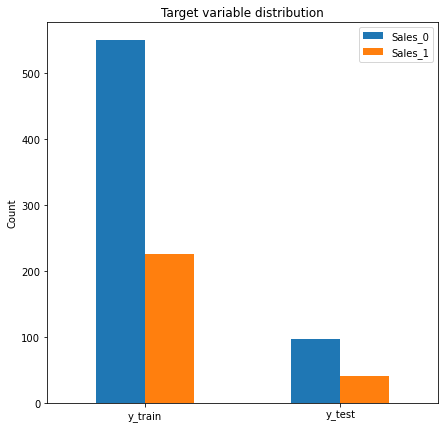

In [261]:
# Visualize target data distribution
plotdata=pd.DataFrame({
    "Sales_0":[y_train.value_counts()[0],y_test.value_counts()[0]],
    "Sales_1":[y_train.value_counts()[1],y_test.value_counts()[1]]},
     index=["y_train","y_test"])
plotdata.plot(kind="bar",figsize=(7,7))
plt.xticks(rotation="horizontal")
plt.title("Target variable distribution")
plt.ylabel("Count")

Note that the data available for Sales_1 field is far lesser than the data available for Sales_0 field. This could contribute to poor model performance. There are many ways to handle imbalance in datasets: namely Undersampling, Oversampling, Generation of synthetic data using SMOTE. Among all these methods, undersampling is not applicable for this problem, because we already have insufficient data to start with. Hence, oversampling is used to handle the problem of imbalanced data in this case.

In [262]:
# Using oversampling to handle the imbalance in proportion of samples belonging to Sales_0 and Sales_1
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_revenue,y)

In [263]:
# Splitting data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.15, random_state=0,stratify=y_over) 

Text(0, 0.5, 'Count')

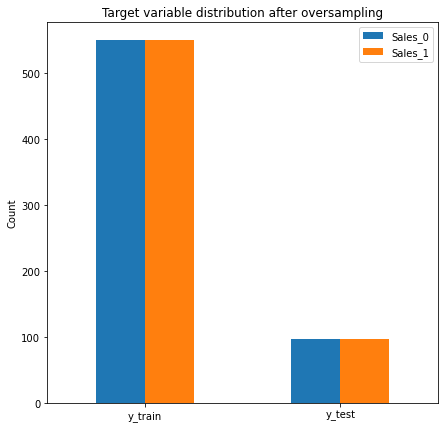

In [264]:
# Visualize target data distribution for over-sampled data
plotdata=pd.DataFrame({
    "Sales_0":[y_train_over.value_counts()[0],y_test_over.value_counts()[0]],
    "Sales_1":[y_train_over.value_counts()[1],y_test_over.value_counts()[1]]},
     index=["y_train","y_test"])
plotdata.plot(kind="bar",figsize=(7,7))
plt.xticks(rotation="horizontal")
plt.title("Target variable distribution after oversampling")
plt.ylabel("Count")

Now train the Decision tree classifier with the oversampled data

### Training Decision tree classifier with the balanced data

In [265]:
# define the model and fit to training data
#weights={0:1.0,1:10.0}
model_DT_over=DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight="balanced",min_samples_leaf=5)
model_DT_over=model_DT_over.fit(X_train_over.loc[:,X_train_over.columns!='Revenue_CL'],y_train_over)

# Calculate weights of each feature
importance=model_DT_over.feature_importances_

#summarize feature importance
df=pd.DataFrame({'Feature':X.columns,'Importance':importance})
df.set_index('Feature',inplace=True)
df.sort_values(by='Importance',ascending=False,inplace=True)


#get predictions from the model
y_pred_DT_over=model_DT_over.predict(X_test_over.loc[:,X_test_over.columns!='Revenue_CL'])

# Probability of predictions
pred_prob_over=model_DT_over.predict_proba(X_test_over.loc[:,X_test_over.columns!='Revenue_CL'])[:,1]  # probability for class value 1

target_names=['Sales_CL']
print(classification_report(y_test_over,y_pred_DT_over))

              precision    recall  f1-score   support

           0       0.56      0.78      0.66        97
           1       0.64      0.39      0.49        97

    accuracy                           0.59       194
   macro avg       0.60      0.59      0.57       194
weighted avg       0.60      0.59      0.57       194



In [266]:
print("Feature importance: {0}\n".format(df))

Feature importance:                               Importance
Feature                                 
Tenure                          0.364030
Age                             0.273344
ActBal_CA                       0.193775
VolumeCred_CA                   0.087215
Client                          0.081637
VolumeDeb_CA                    0.000000
TransactionsCred                0.000000
TransactionsCred_CA             0.000000
VolumeDeb                       0.000000
VolumeDebCash_Card              0.000000
ActBal_CL                       0.000000
VolumeDebCashless_Card          0.000000
VolumeDeb_PaymentOrder          0.000000
TransactionsDeb                 0.000000
TransactionsDeb_CA              0.000000
TransactionsDebCash_Card        0.000000
TransactionsDebCashless_Card    0.000000
VolumeCred                      0.000000
ActBal_OVD                      0.000000
ActBal_CC                       0.000000
ActBal_MF                       0.000000
ActBal_SA                       0.000

In [267]:
clients=X_test_over.loc[:,'Client']
propensity=pred_prob_over
Propensity_CL_over=pd.DataFrame({"Client":clients,"Propensity":propensity})

Propensity_CL_over.drop_duplicates(subset=['Client'],inplace=True)
Propensity_CL_over['Propensity'].shape
clients=Propensity_CL_over['Client']

revenue=X_test_over.query('Client in @clients')['Revenue_CL']
revenue_adjusted=revenue.multiply(Propensity_CL_over['Propensity'])

# Add adjusted revenue field by multiplying revenue and propensity to buy the corresponding product
Propensity_CL_over['Revenue'] = revenue
Propensity_CL_over['Revenue_adjusted'] = revenue_adjusted
Propensity_CL_over.sort_values("Propensity",ascending=False, inplace=True)
Propensity_CL_over

,Client,Propensity,Revenue,Revenue_adjusted
1016,1104,0.925926,6.250000,5.787037
94,172,0.925926,0.000000,0.000000
896,1582,0.925926,12.170714,11.269180
1171,900,0.925926,24.797500,22.960648
994,208,0.925926,5.801786,5.372024
...,...,...,...,...
201,374,0.308824,0.000000,0.000000
1130,537,0.308824,13.214286,4.080882
70,122,0.308824,0.000000,0.000000
443,792,0.308824,16.247500,5.017610


In [268]:
# Write results to excel sheet
with pd.ExcelWriter('D:/Courses and Projects/Revenue optimization/Binary classification/Decision tree/Customer propensity.xlsx') as writer:
        Propensity_MF.to_excel(writer,sheet_name='MutualFunds',index=False)
        Propensity_CC.to_excel(writer,sheet_name='CreditCard',index=False)
        Propensity_CL.to_excel(writer,sheet_name='ConsumerLoan',index=False)

In [269]:
# Write results to excel sheet
with pd.ExcelWriter('D:/Courses and Projects/Revenue optimization/Binary classification/Decision tree/Customer propensity_OverSampled.xlsx') as writer:
        Propensity_MF_over.to_excel(writer,sheet_name='MutualFunds',index=False)
        Propensity_CC_over.to_excel(writer,sheet_name='CreditCard',index=False)
        Propensity_CL_over.to_excel(writer,sheet_name='ConsumerLoan',index=False)